In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data collection

In [2]:
train_data = pd.read_excel("Flight_Price_resources/Data_Train.xlsx")

In [3]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [4]:
train_data.shape

(10683, 11)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
# handle missing value 
train_data.dropna(inplace=True)

In [9]:
data = train_data.copy()

In [10]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


## Data cleaning and analysis

### When will most of the flights take-off?

In [11]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [12]:
# change data type from obj to datetime
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [13]:
for feature in ['Dep_Time', 'Date_of_Journey', 'Arrival_Time']:
    change_into_Datetime(feature)

In [14]:
# split data from col Date_of_Journey into three cols day, month, year
data['Journey_day'] = data['Date_of_Journey'].dt.day
data['Journey_month'] = data['Date_of_Journey'].dt.month
data['Journey_year'] = data['Date_of_Journey'].dt.year

In [15]:
# extract hour and minutes from a col in DataFrame
def extract_hour_min(df, col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(2)

In [16]:
extract_hour_min(data, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-04-18 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-04-18 05:50:00,2024-04-18 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [17]:
extract_hour_min(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-04-18 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-04-18 05:50:00,2024-04-18 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [18]:
cols_to_drop = ['Arrival_Time', 'Dep_Time']

data.drop(cols_to_drop, axis=1, inplace=True)

In [19]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [20]:
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"  
    elif (x>12) and (x<=16):
        return "Noon"  
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late night"

<Axes: xlabel='Dep_Time_hour'>

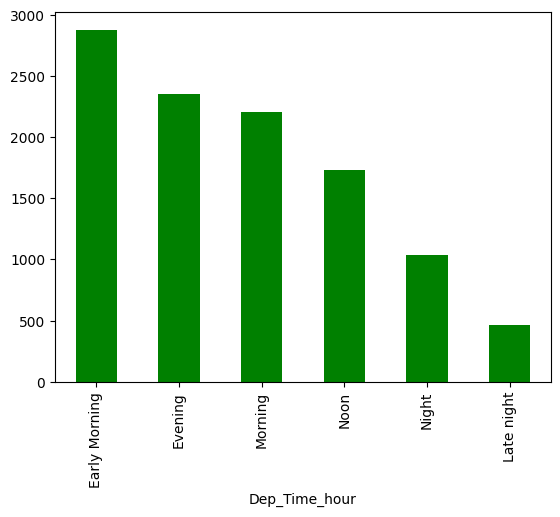

In [21]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar", color="g")

In [22]:
# interactive plot with plotly and cufflinks
# import plotly
# import cufflinks as cf
# from cufflinks.offline import go_offline
# from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
# init_notebook_mode(connected=True)
# cf.go_offline()

 ### Whether Duration impacts Price or not?

In [23]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'
    return x

In [24]:
data['Duration'] = data['Duration'].apply(preprocess_duration)
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [25]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,4,25,9,25,19,0


In [26]:
data['Duration_total_mins'] = data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

In [27]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hours', 'Duration_mins', 'Duration_total_mins'],
      dtype='object')

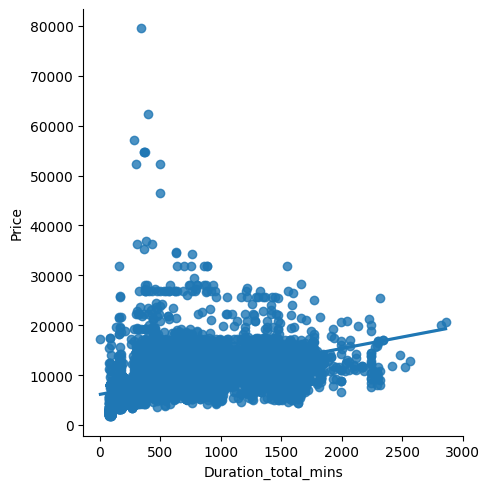

In [28]:
sns.lmplot(x="Duration_total_mins", y="Price", data=data)

A regression line show that as duration increase, prices will also increase.

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

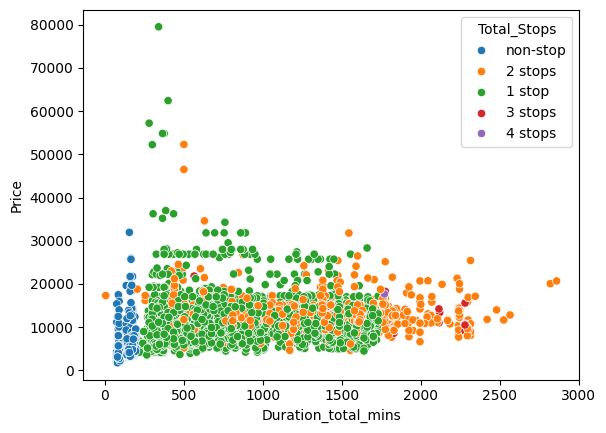

In [29]:
sns.scatterplot(x="Duration_total_mins", y="Price", hue="Total_Stops", data=data)

Non stop flight take less duration. As stop increases, duration also increases and price will also increase in some of the cases

### On which route Jet Airways is extremely used? 

In [30]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

### Airline vs Price Analysis

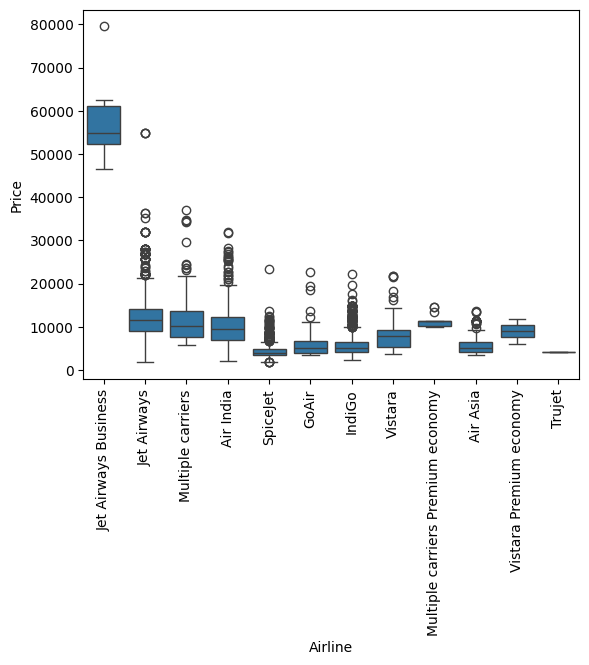

In [31]:
sns.boxplot(y="Price", x="Airline", data=data.sort_values("Price", ascending=False))
plt.xticks(rotation="vertical")
plt.show()

## Feature engineering

### One hot encoding 

In [32]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]
num_col = [col for col in data.columns if data[col].dtype!="object"]

In [33]:
# nominal data
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [34]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x: 1 if x==sub_category else 0) 

In [35]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0


In [36]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

### Target guided encoding

Perform a feature encoding in context of target feature.
Solve problem curse of dimensionality of one-hot encoding


In [37]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [38]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [39]:
dict_airlines = {key:index for index, key in enumerate(airlines, 0)}

In [40]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [41]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [42]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0


In [43]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [44]:
data['Destination'] = data['Destination'].replace('New Delhi', 'Delhi')

In [45]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [46]:
dict_dest = {key:index for index, key in enumerate(dest, 0)}
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [47]:
data['Destination'] = data['Destination'].map(dict_dest)

In [48]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0


 ### Manual Encoding 

In [49]:
# ordinal data
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [50]:
stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [51]:
data['Total_Stops'] = data['Total_Stops'].map(stops)

In [52]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0


 ### Remove unnecessary features

In [53]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hours', 'Duration_mins', 'Duration_total_mins',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

In [54]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [55]:
data['Journey_year'].unique()

array([2019], dtype=int32)

In [56]:
data.drop(columns=['Date_of_Journey', 'Source', 'Route', 'Additional_Info', 'Duration', 'Duration_total_mins', 'Journey_year'], axis=1, inplace=True)

In [57]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'Journey_day',
       'Journey_month', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Dep_Time_hour', 'Dep_Time_minute', 'Duration_hours', 'Duration_mins',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

In [58]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,13,15,5,50,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,4,25,9,25,19,0,0,0,1,0,0


### Handle outlier

In [59]:
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1)

    sns.distplot(df[col], ax=ax1)
    sns.boxplot(x=df[col], ax=ax2)
    sns.distplot(df[col], ax=ax3, kde=False)

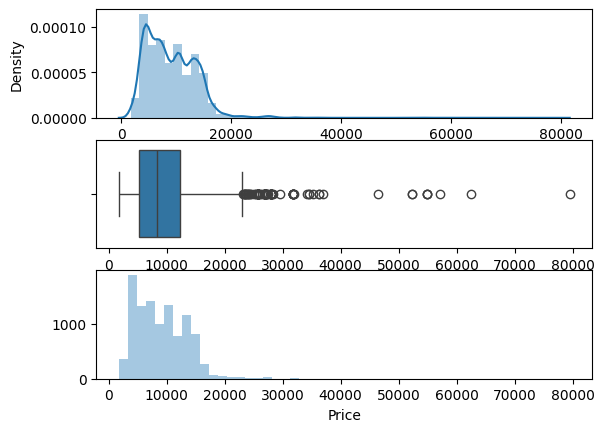

In [60]:
plot(data, 'Price')

In [61]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3 - q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr
print(maximum)
print(minimum)

23017.0
-5367.0


In [62]:
len([price for price in data['Price'] if price>maximum or price<minimum])

94

In [63]:
# replace with median value
data['Price'] = np.where(data['Price']>=35000, data['Price'].median(), data['Price'])

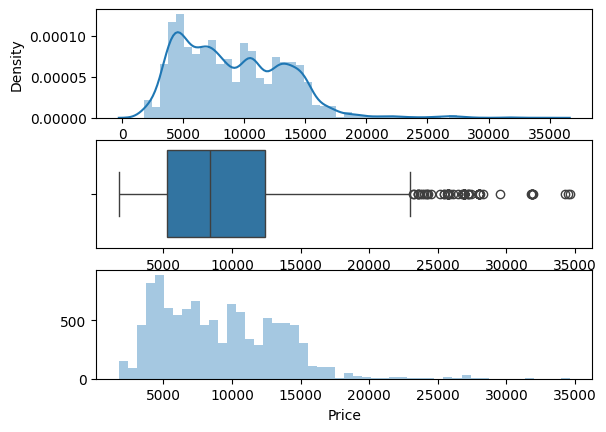

In [64]:
plot(data, 'Price')

### Feature selection

Try to select best feature that have good relation or will contribute a lot to the target variable

In [65]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,3,2,7662.0,1,5,13,15,5,50,7,25,0,1,0,0,0
2,10,4,2,13882.0,9,6,4,25,9,25,19,0,0,0,1,0,0


In [66]:
X = data.drop(['Price'],axis=1)
y = data['Price']

In [67]:
# mutual selection
from sklearn.feature_selection import mutual_info_regression

In [68]:
imp = mutual_info_regression(X, y)

In [69]:
imp_df = pd.DataFrame(imp, index=X.columns)
imp_df.columns = ['importance']
imp_df.sort_values(by='importance', ascending=False)

,importance
Airline,1.320318
Arrival_Time_hour,1.146634
Duration_hours,1.124707
Destination,1.063028
Dep_Time_hour,0.931197
Arrival_Time_minute,0.900682
Total_Stops,0.788750
Dep_Time_minute,0.764438
Duration_mins,0.681028
Journey_month,0.622452


## Modelling

### Random Forest

Decision tree:
- Entropy & Information gain: highest information gain -> parent node
- Gini index: lowest gini index -> parent node

Random forest is a collection of multiple decision trees, it will convert high variance into low variance

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [72]:
ml_model = RandomForestRegressor()
ml_model.fit(X_train, y_train)
y_pred = ml_model.predict(X_test)
y_pred

array([16861.7 ,  5441.82,  8745.02, ...,  3604.04,  6262.09,  6867.83])

In [73]:
metrics.r2_score(y_test, y_pred)

0.8102711581013631

In [74]:
# save model 
import pickle

file = open(r'rf_random.pkl', 'wb')
pickle.dump(ml_model, file)

In [75]:
# load model
model= open(r'rf_random.pkl', 'rb')
forest = pickle.load(model)

In [76]:
y_pred = forest.predict(X_test)
metrics.r2_score(y_test, y_pred)

0.8102711581013631

In [77]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))*100

In [78]:
mape(y_test, y_pred)

13.198111369519516

In [79]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Training score: {}'.format(model.score(X_train, y_train)))
    y_prediction = model.predict(X_test)
    print('Prediction are: {}'.format(y_prediction))
    print('\n')
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_prediction)))
    print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_prediction)))
    print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
    print('MAPE: {}'.format(mape(y_test, y_prediction)))
    sns.distplot(y_test - y_prediction)

Training score: 0.9513833256715517
Prediction are: [16892.64  5435.41  8755.67 ...  3576.98  6202.39  6816.34]


r2 score: 0.81220244521229
MAE: 1173.3073617627535
MSE: 3655967.614753821
RMSE: 1912.0584757673655
MAPE: 13.153017973961326


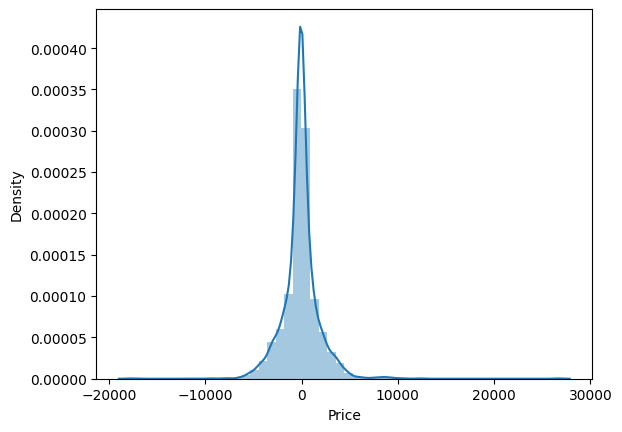

In [80]:
predict(RandomForestRegressor())

In [81]:
from sklearn.tree import DecisionTreeRegressor

Training score: 0.966591628243878
Prediction are: [16840.  4959.  8085. ...  3419.  5797.  6442.]


r2 score: 0.6818085244632871
MAE: 1405.3049794084611
MSE: 6194424.262701235
RMSE: 2488.860032766253
MAPE: 15.496892153362433


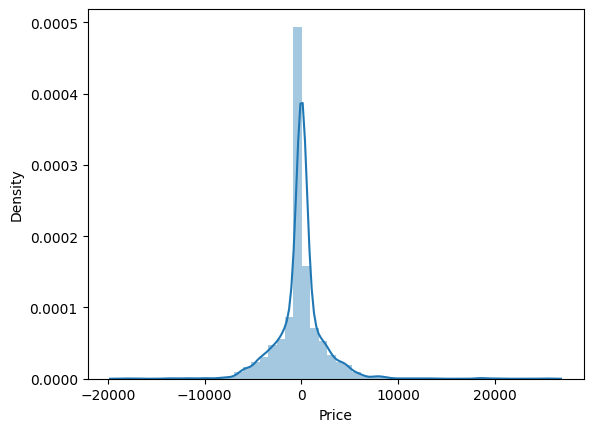

In [82]:
predict(DecisionTreeRegressor())

In [83]:
# hypertune
from sklearn.model_selection import RandomizedSearchCV

In [84]:
reg_rf = RandomForestRegressor()

In [85]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=6)]
max_features = ["auto", "sqrt"]
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=4)]
min_samples_split = [5,10,15,100]

In [86]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [87]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, cv=3, n_jobs=-1, verbose=2)

In [88]:
rf_random.fit(X,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [89]:
rf_random.best_params_

{'n_estimators': 760,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 30}

In [90]:
rf_random.best_score_

0.8182482979800282